In [97]:
# 1. Завантаження зображень
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from sklearn.decomposition import TruncatedSVD
image1 = io.imread("11.jpg")
image2 = io.imread("22.jpg")
image3 = io.imread("33.png")

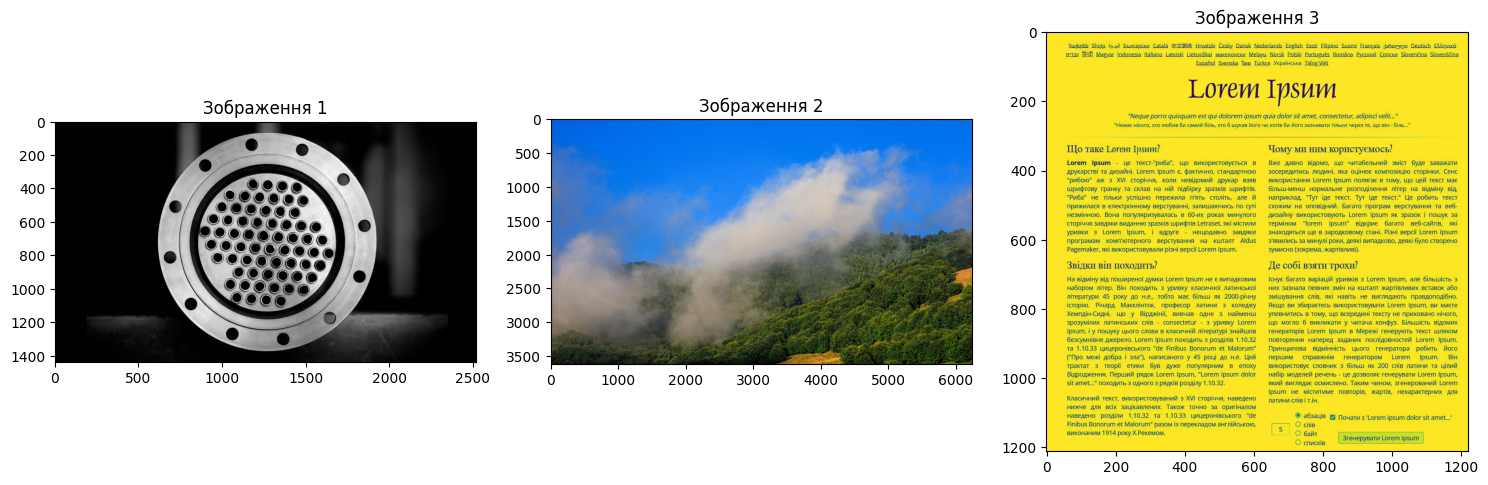

In [98]:
# 2. Виведення зображень
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image1)
axes[0].set_title('Зображення 1')
axes[0].axis('on')
axes[1].imshow(image2)
axes[1].set_title('Зображення 2')
axes[1].axis('on')
axes[2].imshow(image3)
axes[2].set_title('Зображення 3')
axes[2].axis('on')
plt.tight_layout()
plt.show()

In [99]:
# 3. Визначення розміру
print("Image 1 shape:", image1.shape)
print("Image 2 shape:", image2.shape)
print("Image 3 shape:", image3.shape)


Image 1 shape: (1438, 2521, 3)
Image 2 shape: (3619, 6235, 3)
Image 3 shape: (1213, 1219)


In [101]:
# 4. Зміна форми зображення з 3D-матриці на 2D-матрицю
# Поміщаємо всі зображення у список
images = [image1, image2, image3]
flat_images = []

for i, img in enumerate(images, 1):
    # Робимо копію зображень
    temp_img = img.copy()

    # Якщо зображення чорно-біле (2D), додаємо канали
    if temp_img.ndim == 2:
        temp_img = np.stack([temp_img]*3, axis=-1)

    h, w, c = temp_img.shape
    print(f"Зображення {i}:")
    print(f"  - Оригінальний розмір: {temp_img.shape}")

    # Перетворення у 2D (height, width * channels)
    flat_img = temp_img.reshape(-1, w * c)
    flat_images.append(flat_img)

    print(f"  - Розмір 2D матриці: {flat_img.shape}")
    print("-" * 30)

Зображення 1:
  - Оригінальний розмір: (1438, 2521, 3)
  - Розмір 2D матриці: (1438, 7563)
------------------------------
Зображення 2:
  - Оригінальний розмір: (3619, 6235, 3)
  - Розмір 2D матриці: (3619, 18705)
------------------------------
Зображення 3:
  - Оригінальний розмір: (1213, 1219, 3)
  - Розмір 2D матриці: (1213, 3657)
------------------------------


In [102]:
# 5.Застосування SVD декомпозиції за допомогою функції svd з бібліотеки numpy.
# Списки для збереження результатів декомпозиції
U_list = []
S_list = []
Vt_list = []

print("Початок SVD декомпозиції...")

for i, f_img in enumerate(flat_images, 1):
    # Обчислюємо SVD
    U, S, Vt = np.linalg.svd(f_img, full_matrices=False)

    # Зберігаємо результати
    U_list.append(U)
    S_list.append(S)
    Vt_list.append(Vt)

    print(f"Зображення {i}:")
    print(f"  - Матриця U: {U.shape}")
    print(f"  - Матриця Σ (S): {S.shape}")
    print(f"  - Матриця V^T: {Vt.shape}")
    print("-" * 30)

print("SVD для всіх зображень виконано!")


Початок SVD декомпозиції...
Зображення 1:
  - Матриця U: (1438, 1438)
  - Матриця Σ (S): (1438,)
  - Матриця V^T: (1438, 7563)
------------------------------
Зображення 2:
  - Матриця U: (3619, 3619)
  - Матриця Σ (S): (3619,)
  - Матриця V^T: (3619, 18705)
------------------------------
Зображення 3:
  - Матриця U: (1213, 1213)
  - Матриця Σ (S): (1213,)
  - Матриця V^T: (1213, 3657)
------------------------------
SVD для всіх зображень виконано!


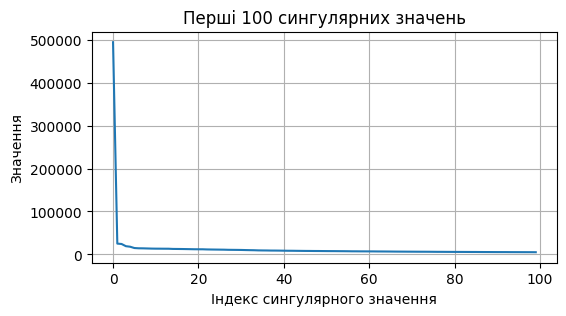

In [103]:
# 6. Візуалізуйте перші  k  значень матриці Σ
k = 100
plt.figure(figsize=(6, 3))
plt.plot(np.arange(k), S[:k])
plt.xlabel("Індекс сингулярного значення")
plt.ylabel("Значення")
plt.title(f"Перші {k} сингулярних значень")
plt.grid(True)
plt.show()

In [104]:
# 7. Усічений SVD (TruncatedSVD)
n_components = 100
svd_model = TruncatedSVD(n_components=n_components, random_state=42)

# Списки для збереження стиснених даних та моделей
truncated_images = []
svd_models = []

print(f"Стиснення зображень до k={n_components} компонент...")

for i, f_img in enumerate(flat_images, 1):
    # Навчаємо модель та трансформуємо (стискаємо) зображення
    # flat_images ми підготували на кроці 4
    truncated_img = svd_model.fit_transform(f_img)

    # Зберігаємо результат та модель (вона знадобиться для відновлення)
    truncated_images.append(truncated_img)
    svd_models.append(svd_model) # зберігаємо стан для inverse_transform

    print(f"Зображення {i}:")
    print(f"  - Початковий розмір: {f_img.shape}")
    print(f"  - Стиснений розмір: {truncated_img.shape}")
    print("-" * 40)

print("Стиснення завершено!")


Стиснення зображень до k=100 компонент...
Зображення 1:
  - Початковий розмір: (1438, 7563)
  - Стиснений розмір: (1438, 100)
----------------------------------------
Зображення 2:
  - Початковий розмір: (3619, 18705)
  - Стиснений розмір: (3619, 100)
----------------------------------------
Зображення 3:
  - Початковий розмір: (1213, 3657)
  - Стиснений розмір: (1213, 100)
----------------------------------------
Стиснення завершено!


In [105]:
# 8. Відновлення зображення зі стисненого стану
# Списки для збереження результатів
reconstructed_flat_images = []
mse_errors = []

print("Реконструкція та вимірювання помилок...")

for i in range(len(truncated_images)):
    # 1. Відновлюємо зображення зі стисненого стану
    # Використовуємо відповідну модель для кожного фото
    reconstructed_flat = svd_models[i].inverse_transform(truncated_images[i])
    reconstructed_flat_images.append(reconstructed_flat)

    # 2. Розраховуємо середню квадратичну помилку (MSE)
    # Порівнюємо оригінальну 2D-матрицю (flat_images) з відновленою
    mse = np.mean(np.square(reconstructed_flat - flat_images[i]))
    mse_errors.append(mse)

    print(f"Зображення {i+1}:")
    print(f"  - Помилка реконструкції (MSE): {mse:.4f}")
    print("-" * 30)

print("Розрахунок завершено!")

Реконструкція та вимірювання помилок...


ValueError: operands could not be broadcast together with shapes (1438,3657) (1438,7563) 